# Facility Location Problem

## Problem Description
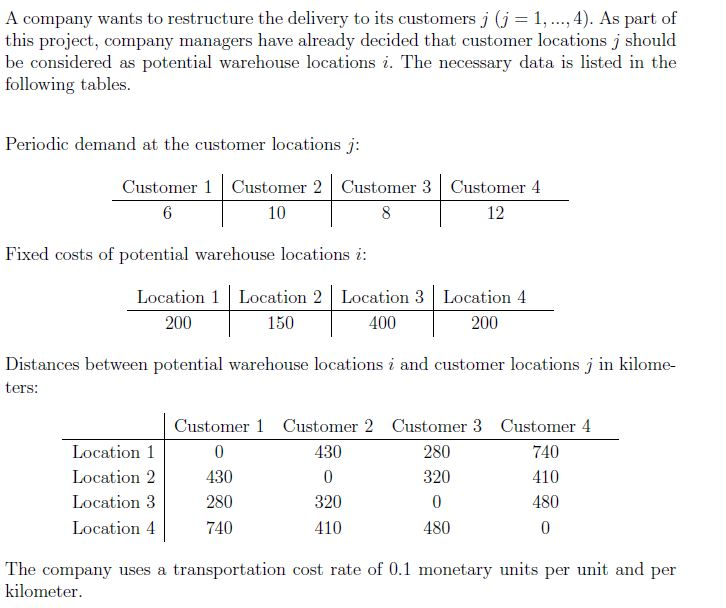

## Model Formulation

### Sets and Indices

$i \in I$: Index and set of supermarket (or customer) locations.

$j \in J$: Index and set of candidate warehouse (or facility) locations.

### Parameters

$f_{j} \in \mathbb{R}^+$: Fixed cost associated with constructing facility $j \in J$.

$d_{i,j} \in \mathbb{R}^+$: Distance between facility $j \in J$ and customer $i \in I$.

$c_{i,j} \in \mathbb{R}^+$: Cost of shipping between candidate facility site $j \in J$ and customer location $i \in I$. We assume that this cost is proportional to the distance between the facility and the customer. That is, $c_{i,j} = \alpha \cdot d_{i,j}$, where $\alpha$ is the cost per mile of driving, adjusted to incorporate the average number of trips a delivery truck would be expected to make over a five year period.

### Decision Variables

$select_{j} \in \{0, 1 \}$: This variable is equal to 1 if we build a facility at candidate location $j \in J$; and 0 otherwise.

$0 \leq assign_{i,j} \leq 1$: This non-negative continuous variable determines the fraction of supply received by customer $i \in I$ from facility $j \in J$.

### Objective Function

- **Total costs**. We want to minimize the total cost to open and operate the facilities. This is the sum of the cost of opening facilities and the cost related to shipping between facilities and customers. This total cost measures the tradeoff between the cost of building a new facility and the total delivery cost over a five year period.

\begin{equation}
\text{Min} \quad Z = \sum_{j \in J} f_{j} \cdot select_{j} + \sum_{j \in J} \sum_{i \in I} c_{i,j} \cdot assign_{i,j}
\tag{0}
\end{equation}

### Constraints

- **Demand**. For each customer  $i \in I$ ensure that its demand is fulfilled. That is, the sum of the fraction received from each facility for each customer must be equal to 1:

\begin{equation}
\sum_{j \in J} assign_{i,j} = 1 \quad \forall i \in I
\tag{1}
\end{equation}

- **Shipping**. We need to ensure that we  only ship from facility $j \in J$,  if that facility has actually been built.

\begin{equation}
assign_{i,j} \leq select_{j} \quad \forall i \in I \quad \forall j \in J
\tag{2}
\end{equation}

## Python Implementation
#### Using Gurobi Python module and other Python libraries

In [ ]:
from itertools import product
from math import sqrt
import itertools

import gurobipy as gp
from gurobipy import GRB

#Parameters
customers = [0, 1, 2, 3]
warehouses = [0, 1, 2, 3]
setup_cost = [200, 150, 400, 200]

cost = { (customers[0],warehouses[0]):0,   (customers[0],warehouses[1]):430, (customers[0],warehouses[2]):224, (customers[0],warehouses[3]):888,
         (customers[1],warehouses[0]):258, (customers[1],warehouses[1]):0,   (customers[1],warehouses[2]):256, (customers[1],warehouses[3]):492,
         (customers[2],warehouses[0]):168, (customers[2],warehouses[1]):320, (customers[2],warehouses[2]):0,   (customers[2],warehouses[3]):576,
         (customers[3],warehouses[0]):444, (customers[3],warehouses[1]):410, (customers[3],warehouses[2]):384, (customers[3],warehouses[3]):0
       }




In [2]:
# Compute key parameters of MIP model formulation

num_warehouses = len(warehouses)
num_customers = len(customers)
cartesian_prod = list(product(range(num_customers), range(num_warehouses)))


In [3]:
m = gp.Model("facility_location")

assign,select = {},{}
select = m.addVars(num_warehouses, vtype=GRB.BINARY, name='Select')
assign = m.addVars(cartesian_prod, ub=1, vtype=GRB.CONTINUOUS, name='Assign')

m.addConstrs((assign[(c,w)] <= select[w] for c,w in cartesian_prod), name='source2sink')
m.addConstrs((gp.quicksum(assign[(c,w)] for w in range(num_warehouses)) == 1 for c in range(num_customers)), name='Demand')

m.setObjective(select.prod(setup_cost)+assign.prod(cost), GRB.MINIMIZE)

m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2022-08-05
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 2 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 20 rows, 20 columns and 48 nonzeros
Model fingerprint: 0x0780b492
Variable types: 16 continuous, 4 integer (4 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 9e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.00s
Presolved: 20 rows, 20 columns, 48 nonzeros
Variable types: 16 continuous, 4 integer (4 binary)
Found heuristic solution: objective 950.0000000

Root relaxation: objective 7.180000e+02, 4 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     718.0000000  718.00000  0.00%     -    0s

In [8]:
for warehouse in select.keys():
    if (abs(select[warehouse].x) > 1e-6):
        print(f"\n Build a warehouse at location {facility + 1}.")


 Build a warehouse at location 4.

 Build a warehouse at location 4.

 Build a warehouse at location 4.


In [9]:
# Shipments from facilities to customers.

for customer, warehouse in assign.keys():
    if (abs(assign[customer, warehouse].x) > 1e-6):
        print(f"\n Customer {customer + 1} receives {round(100*assign[customer, warehouse].x, 2)} % of its demand  from Warehouse {warehouse + 1} .")



 Customer 1 receives 100.0 % of its demand  from Warehouse 1 .

 Customer 2 receives 100.0 % of its demand  from Warehouse 2 .

 Customer 3 receives 100.0 % of its demand  from Warehouse 1 .

 Customer 4 receives 100.0 % of its demand  from Warehouse 4 .
